# PIN-SLAM running on the KITTI-Odometry benchmark dataset
The aim of this notebook is to serve as a reproducible entry point for the experiments outlined in the paper.

This notebook is inspired by [KISS-ICP](https://nbviewer.org/github/nachovizzo/kiss-icp/blob/main/evaluation/kitti.ipynb).

Please download the dataset from [here](https://www.cvlibs.net/datasets/kitti/eval_odometry.php).

Note: the results are slightly different using different random seeds and different hardwares.

In [1]:
import torch
print('Device used:', torch.cuda.get_device_name(0))

Device used: NVIDIA RTX A4000


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Now evaluate sequence 00


100%|██████████| 4541/4541 [14:04<00:00,  5.38it/s]


Odometry evaluation:

Average Translation Error       (%): 0.567

Average Rotational Error (deg/100m): 0.245

Absoulte Trajectory Error       (m): 5.842

SLAM evaluation:

Average Translation Error       (%): 0.611

Average Rotational Error (deg/100m): 0.179

Absoulte Trajectory Error       (m): 0.863

# Loop corrected:  35

Now evaluate sequence 01


100%|██████████| 1101/1101 [04:16<00:00,  4.29it/s]


Odometry evaluation:

Average Translation Error       (%): 0.740

Average Rotational Error (deg/100m): 0.088

Absoulte Trajectory Error       (m): 2.817

SLAM evaluation:

Average Translation Error       (%): 0.740

Average Rotational Error (deg/100m): 0.088

Absoulte Trajectory Error       (m): 2.817

No loop found

Now evaluate sequence 02


100%|██████████| 4661/4661 [18:01<00:00,  4.31it/s]


Odometry evaluation:

Average Translation Error       (%): 0.534

Average Rotational Error (deg/100m): 0.172

Absoulte Trajectory Error       (m): 9.582

SLAM evaluation:

Average Translation Error       (%): 0.539

Average Rotational Error (deg/100m): 0.104

Absoulte Trajectory Error       (m): 2.002

# Loop corrected:  13

Now evaluate sequence 03


100%|██████████| 801/801 [02:52<00:00,  4.65it/s]


Odometry evaluation:

Average Translation Error       (%): 0.830

Average Rotational Error (deg/100m): 0.260

Absoulte Trajectory Error       (m): 0.739

SLAM evaluation:

Average Translation Error       (%): 0.830

Average Rotational Error (deg/100m): 0.260

Absoulte Trajectory Error       (m): 0.739

No loop found

Now evaluate sequence 04


100%|██████████| 271/271 [00:48<00:00,  5.61it/s]


Odometry evaluation:

Average Translation Error       (%): 0.216

Average Rotational Error (deg/100m): 0.174

Absoulte Trajectory Error       (m): 0.155

SLAM evaluation:

Average Translation Error       (%): 0.216

Average Rotational Error (deg/100m): 0.174

Absoulte Trajectory Error       (m): 0.155

No loop found

Now evaluate sequence 05


100%|██████████| 2761/2761 [08:47<00:00,  5.24it/s]


Odometry evaluation:

Average Translation Error       (%): 0.282

Average Rotational Error (deg/100m): 0.133

Absoulte Trajectory Error       (m): 1.526

SLAM evaluation:

Average Translation Error       (%): 0.309

Average Rotational Error (deg/100m): 0.074

Absoulte Trajectory Error       (m): 0.304

# Loop corrected:  20

Now evaluate sequence 06


100%|██████████| 1101/1101 [03:54<00:00,  4.70it/s]


Odometry evaluation:

Average Translation Error       (%): 0.357

Average Rotational Error (deg/100m): 0.100

Absoulte Trajectory Error       (m): 0.527

SLAM evaluation:

Average Translation Error       (%): 0.383

Average Rotational Error (deg/100m): 0.095

Absoulte Trajectory Error       (m): 0.431

# Loop corrected:  13

Now evaluate sequence 07


100%|██████████| 1101/1101 [03:29<00:00,  5.26it/s]


Odometry evaluation:

Average Translation Error       (%): 0.307

Average Rotational Error (deg/100m): 0.161

Absoulte Trajectory Error       (m): 0.431

SLAM evaluation:

Average Translation Error       (%): 0.372

Average Rotational Error (deg/100m): 0.111

Absoulte Trajectory Error       (m): 0.288

# Loop corrected:  1

Now evaluate sequence 08


100%|██████████| 4071/4071 [13:26<00:00,  5.05it/s]


Odometry evaluation:

Average Translation Error       (%): 0.787

Average Rotational Error (deg/100m): 0.194

Absoulte Trajectory Error       (m): 2.980

SLAM evaluation:

Average Translation Error       (%): 0.808

Average Rotational Error (deg/100m): 0.140

Absoulte Trajectory Error       (m): 1.911

# Loop corrected:  7

Now evaluate sequence 09


100%|██████████| 1591/1591 [05:59<00:00,  4.42it/s]


Odometry evaluation:

Average Translation Error       (%): 0.545

Average Rotational Error (deg/100m): 0.131

Absoulte Trajectory Error       (m): 1.415

SLAM evaluation:

Average Translation Error       (%): 0.625

Average Rotational Error (deg/100m): 0.104

Absoulte Trajectory Error       (m): 1.214

# Loop corrected:  1

Now evaluate sequence 10


100%|██████████| 1201/1201 [04:26<00:00,  4.50it/s]


Odometry evaluation:

Average Translation Error       (%): 0.509

Average Rotational Error (deg/100m): 0.163

Absoulte Trajectory Error       (m): 0.838

SLAM evaluation:

Average Translation Error       (%): 0.509

Average Rotational Error (deg/100m): 0.163

Absoulte Trajectory Error       (m): 0.838

No loop found

# Experiment Results (KITTI dataset) 
|Metric|Value|
|-:|:-|
Odometry ATE [%]|0.52|
Odometry ARE [deg/100m]|0.17|
SLAM RMSE [m]|1.05|


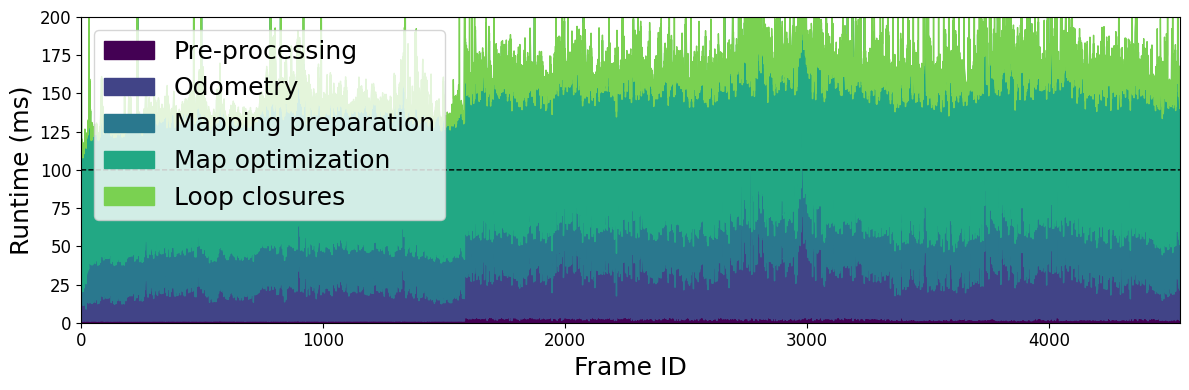

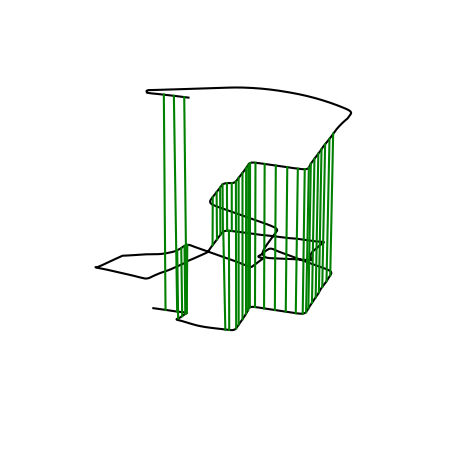

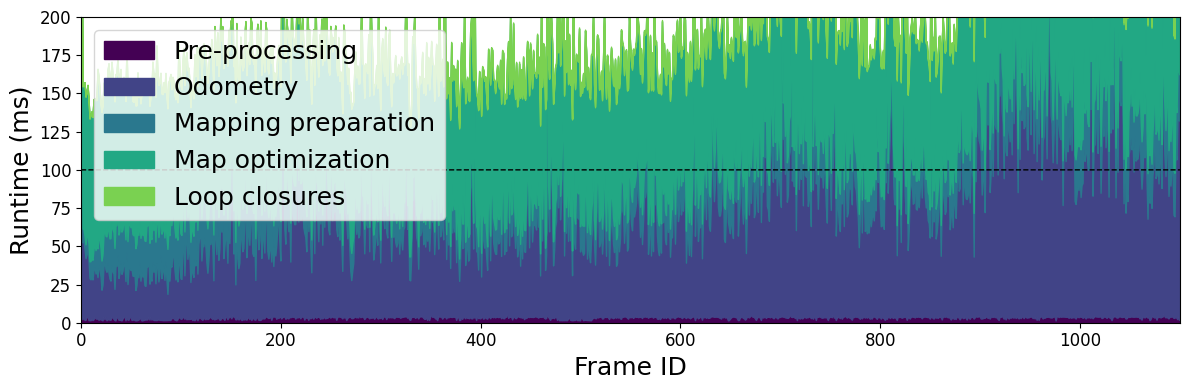

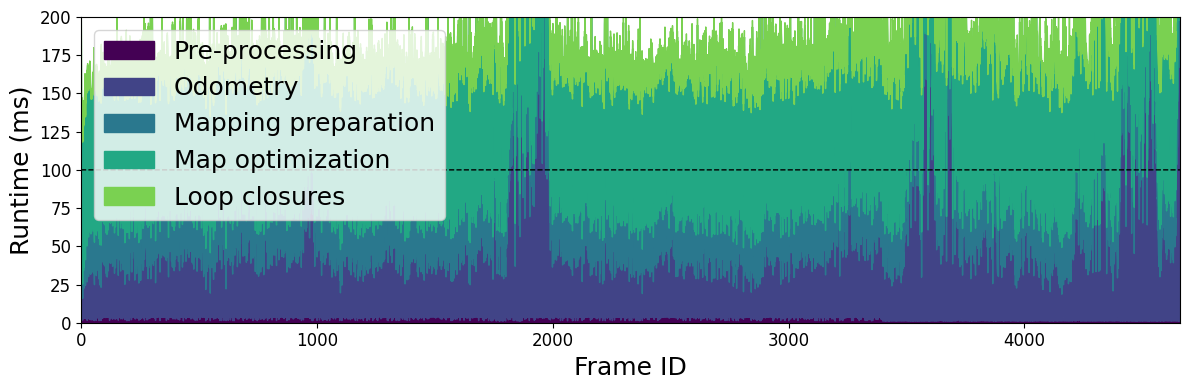

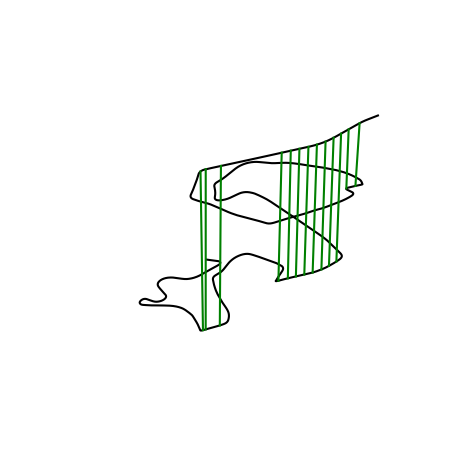

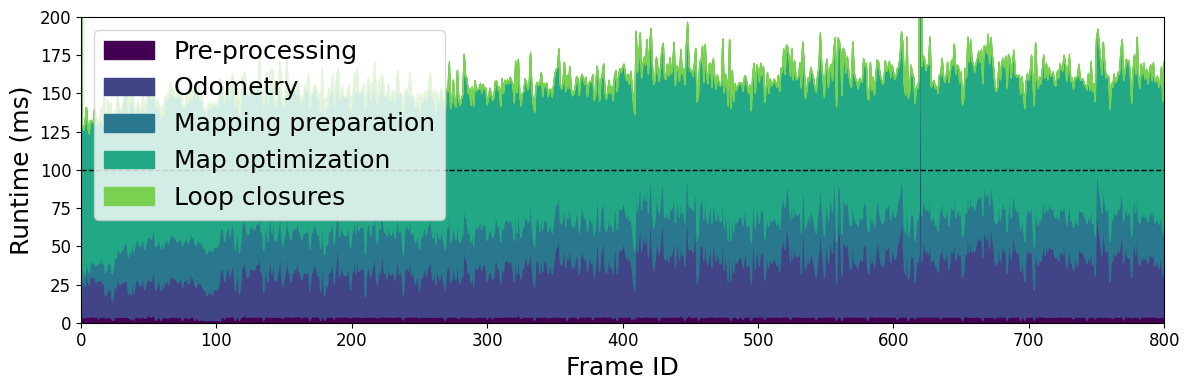

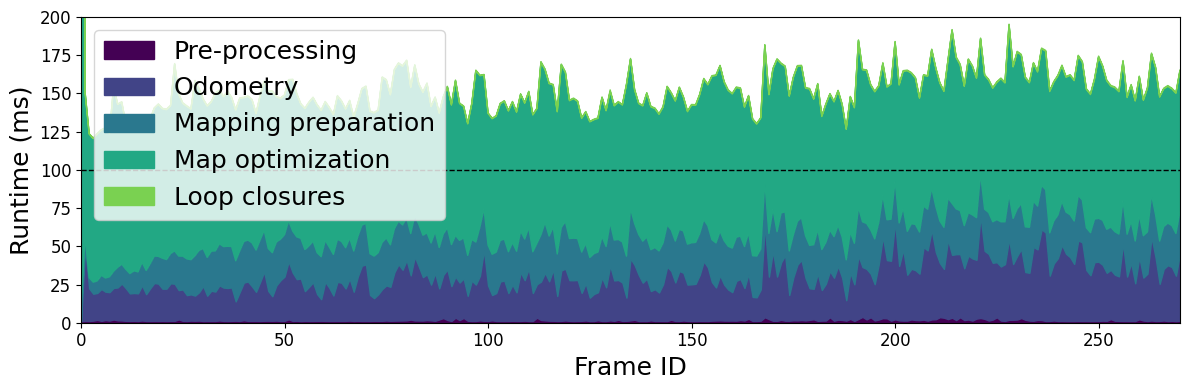

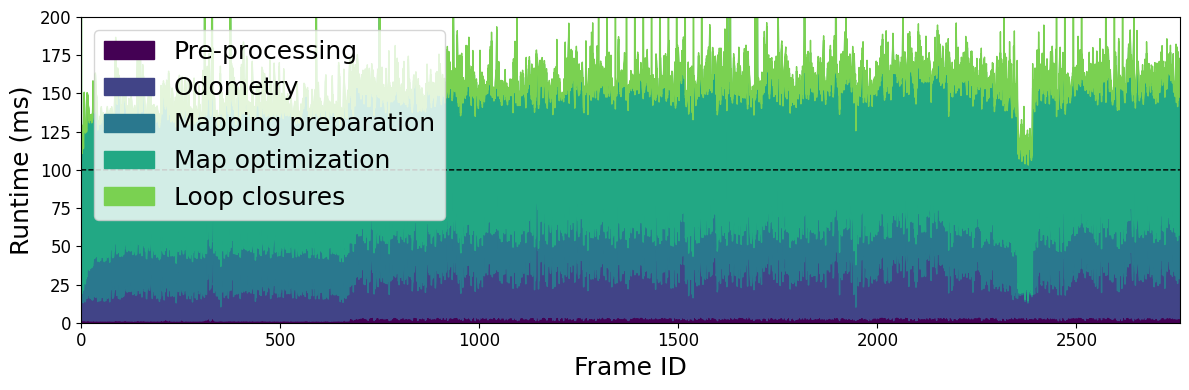

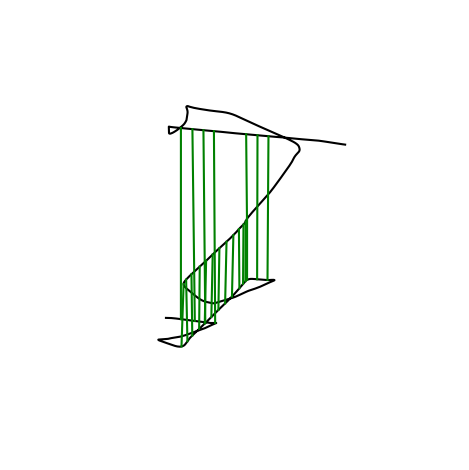

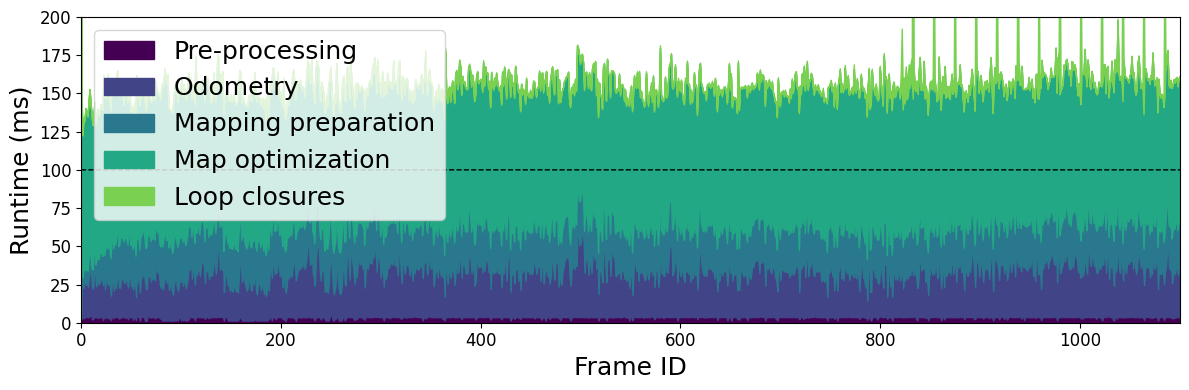

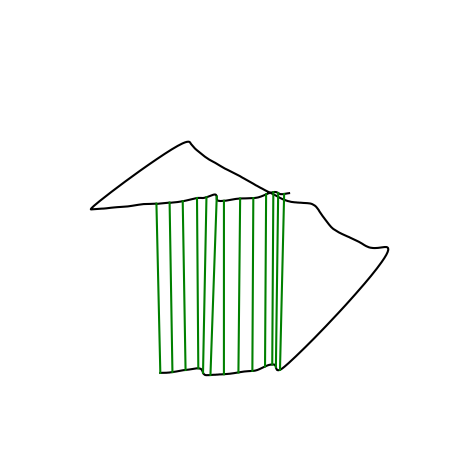

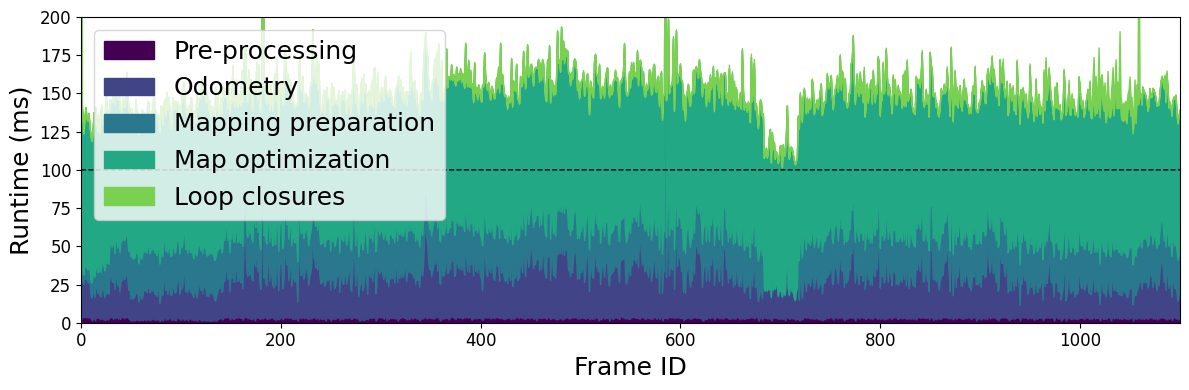

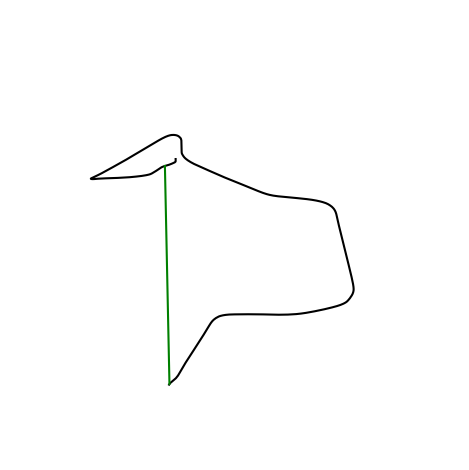

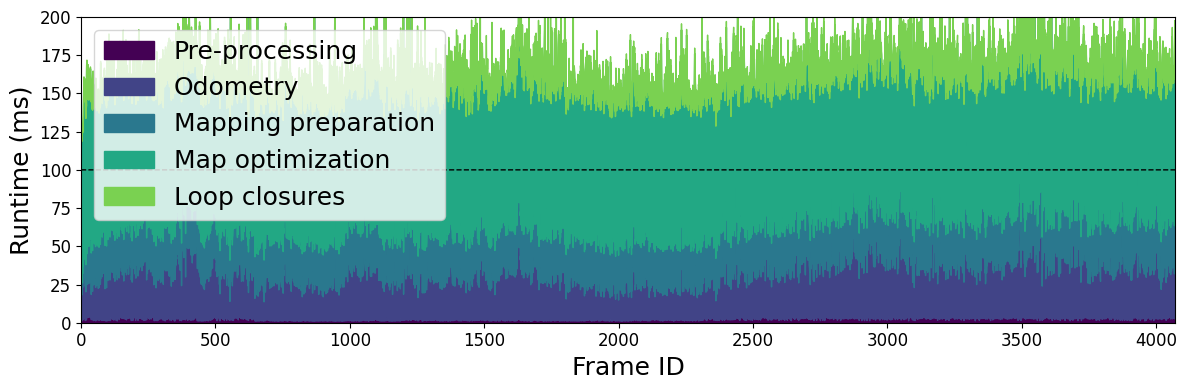

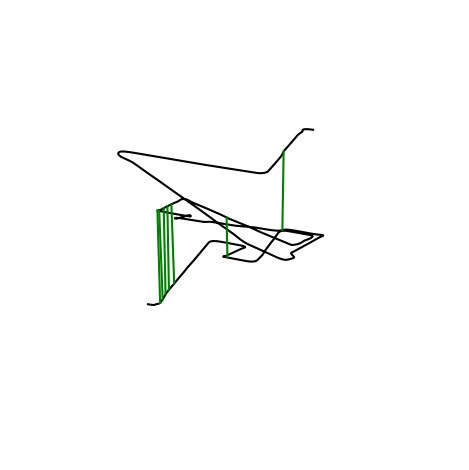

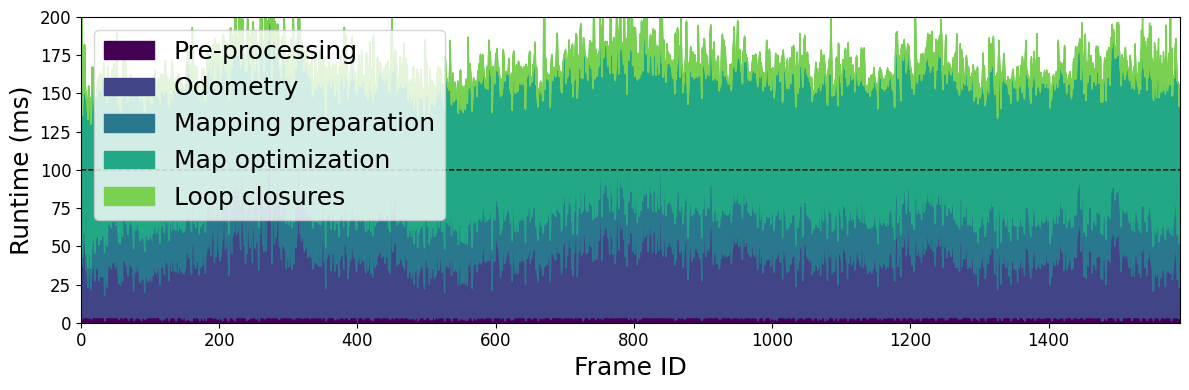

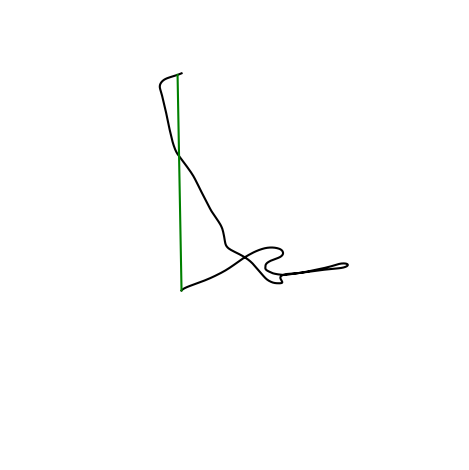

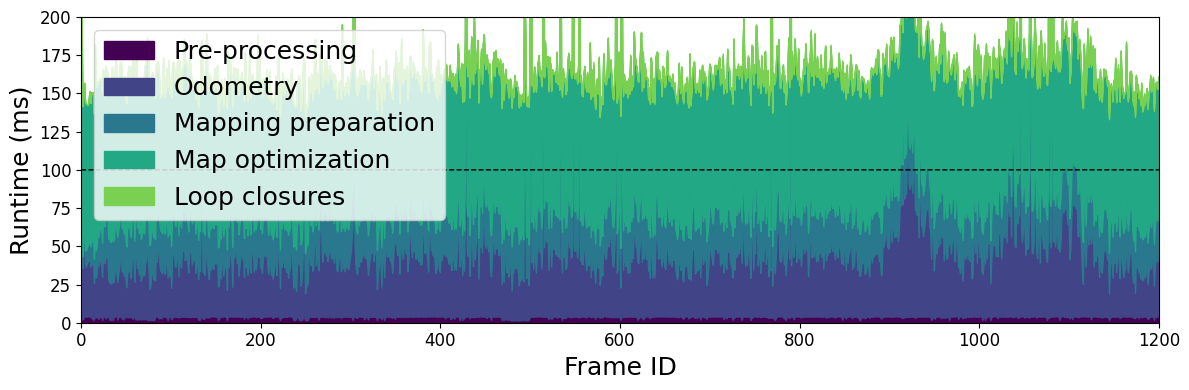

In [1]:
import pin_slam
from eval.eval_traj_utils import get_metrics, mean_metrics
from IPython.display import display_markdown

metrics_dicts = []
for seq in range(11):
    seq_str = f'{seq:02d}'
    print('Now evaluate sequence '+ seq_str)
    seq_results = pin_slam.run_pin_slam('./config/lidar_slam/run_kitti.yaml', 'kitti', seq_str)
    metrics_dict = get_metrics(seq_results)
    metrics_dicts.append(metrics_dict)

metric_mean = mean_metrics(metrics_dicts)
table_results = f"# Experiment Results (KITTI dataset) \n|Metric|Value|\n|-:|:-|\n"
for metric, result in metric_mean.items():
    table_results += f"{metric}|{result:.2f}|\n"
display_markdown(table_results, raw=True)
